Dataset shape: (100, 3)
Missing values:
 state                 0
incarceration_rate    0
graduation_rate       0
dtype: int64

NumPy Statistics:
Mean incarceration rate: 446.8192000000001
Max graduation rate: 98.6
Min graduation rate: 74.87
Range of incarceration rate: 261.94000000000005
Standard deviation of graduation rate: 4.752224299209792

SciPy T-test: t=60.11, p=0.0000

Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:     incarceration_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2655
Date:                Sat, 17 May 2025   Prob (F-statistic):              0.608
Time:                        19:07:00   Log-Likelihood:                -550.55
No. Observations:                 100   AIC:                             1105.
Df Residuals:                      

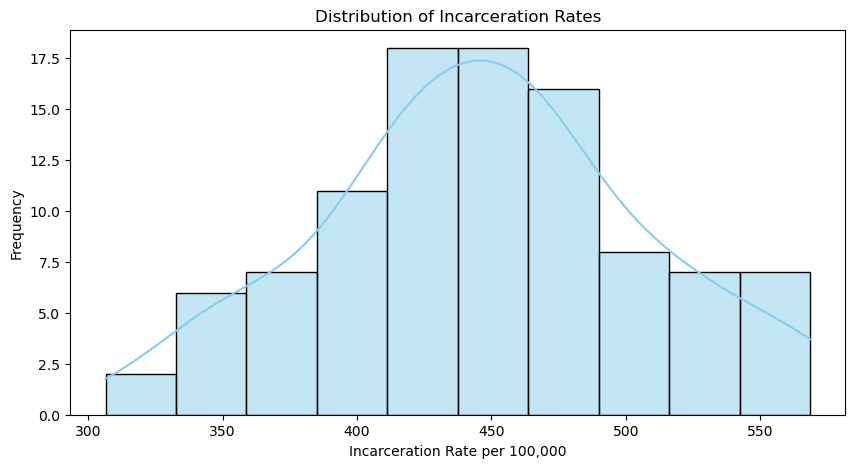

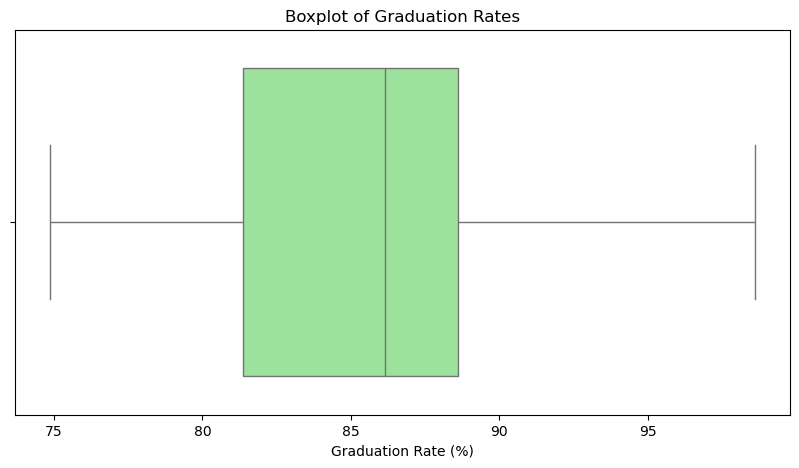

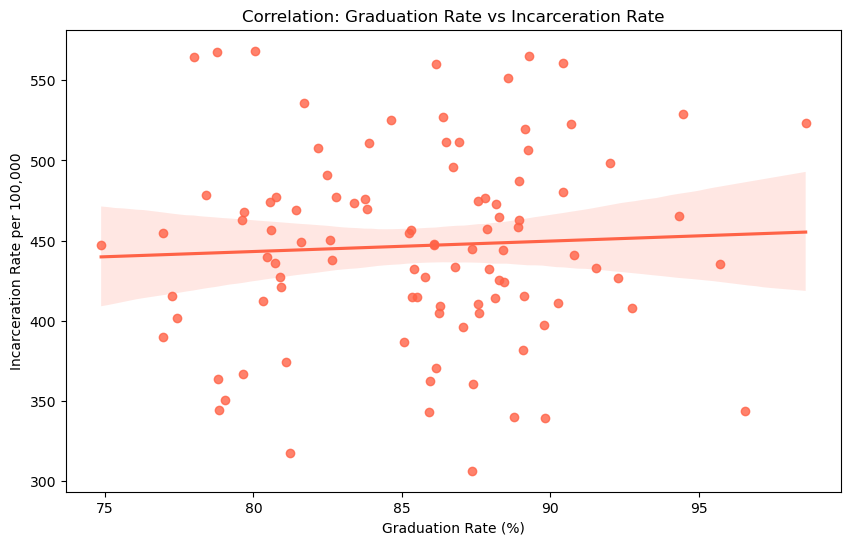

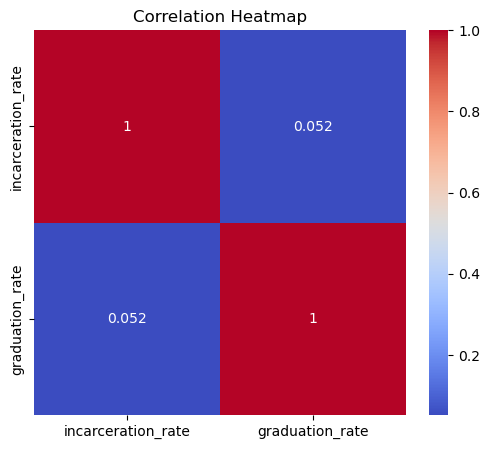

In [5]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned, no-outliers dataset
df = pd.read_csv('final_clean_no_outliers_dataset.csv')

# Confirm data integrity
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
assert df.shape[0] >= 100, "Dataset must have at least 100 clean rows."

# NumPy analysis
incarceration = df['incarceration_rate'].to_numpy()
graduation = df['graduation_rate'].to_numpy()

print("\nNumPy Statistics:")
print("Mean incarceration rate:", np.mean(incarceration))
print("Max graduation rate:", np.max(graduation))
print("Min graduation rate:", np.min(graduation))
print("Range of incarceration rate:", np.ptp(incarceration))
print("Standard deviation of graduation rate:", np.std(graduation))

# SciPy t-test
t_stat, p_val = stats.ttest_ind(incarceration, graduation)
print(f"\nSciPy T-test: t={t_stat:.2f}, p={p_val:.4f}")

# Statsmodels linear regression
X = sm.add_constant(df['graduation_rate'])
model = sm.OLS(df['incarceration_rate'], X).fit()
print("\nStatsmodels Regression Summary:")
print(model.summary())

# --- Visualizations ---
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['incarceration_rate'], kde=True, color='skyblue')
plt.title('Distribution of Incarceration Rates')
plt.xlabel('Incarceration Rate per 100,000')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['graduation_rate'], color='lightgreen')
plt.title('Boxplot of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.show()

# Correlation Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='graduation_rate', y='incarceration_rate', data=df, color='tomato')
plt.title('Correlation: Graduation Rate vs Incarceration Rate')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Incarceration Rate per 100,000')
plt.show()

# Optional: Correlation heatmap
plt.figure(figsize=(6, 5))
corr_matrix = df[['incarceration_rate', 'graduation_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
